In [3]:
# Full library list and version numbers

print('This notebook was prepared using:')

import sys
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import seaborn as sns
print('seaborn version %s' % sns.__version__)

import matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
print('matplotlib version %s' % matplotlib.__version__)

sys.path.append('./src')

import mplot as mp  # See mplot.py in the current directory

import scipy
from scipy import stats
print('scipy version %s' % scipy.__version__)

import pickle
print('pickle version %s' % pickle.format_version)

import importlib

import lolipop_helper
import figures as FIG
import PALTEanalysis
import tobramycin_analysis

import MPL as MPL
import analyze_and_plot as AP
import reconstruct_clades as RC
import infer_fitness as IF
import print_info as PI
import LTEE
import LTEE_helper as LH
import simulation_helper as SH

# GitHub directories
DATA_DIR = './data'
SIMULATION_DIR = './data/simulation'
CLUSTERIZATION_OUTPUT_DIR = './data/clusterization_output'
RECONSTRUCTION_OUTPUT_DIR = './data/reconstruction_output'
LOLIPOP_JOBS_DIR = './data/lolipop/jobs'
LOLIPOP_INPUT_DIR = './data/lolipop/input'
LOLIPOP_OUTPUT_DIR = './data/lolipop/output'
LOLIPOP_PARSED_OUTPUT_DIR = './data/lolipop/parsed_output'
JOB_DIR = './jobs'
FIG_DIR = './figures'

METHODS = FIG.METHODS

This notebook was prepared using:
python version 3.6.10 |Anaconda, Inc.| (default, Mar 25 2020, 18:53:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.19.1
seaborn version 0.11.0
matplotlib version 3.3.2
scipy version 1.5.2
pickle version 4.0


In [4]:
def reload():
    importlib.reload(AP)
    importlib.reload(RC)
    importlib.reload(IF)
    importlib.reload(LH)
    importlib.reload(PI)
    importlib.reload(lolipop_helper)
    importlib.reload(FIG)
    importlib.reload(PALTEanalysis)
    importlib.reload(tobramycin_analysis)
    importlib.reload(mp)
    importlib.reload(SH)
reload()

In [5]:
def resetPlottingParams():
    PARAMS = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'mathtext.default': 'regular', 'pdf.fonttype': 42, 'ps.fonttype': 42}
    plt.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams.update(PARAMS)

In [6]:
resetPlottingParams()

In [7]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Figures and data analysis

<a id='fig1'></a>

### Figure 1. Clade competition is accurately reconstructed from simulated allele frequency trajectories. 

In [9]:
%%time
reload()
params = SH.Params()  # Default parameters for simulation
# Load the first simulation, and get reconstruction result
simulation = SH.load_simulation(params, 0)
reconstruction, evaluation = SH.get_reconstruction_of_simulation(simulation)

CPU times: user 9.11 s, sys: 63.6 ms, total: 9.18 s
Wall time: 9.21 s


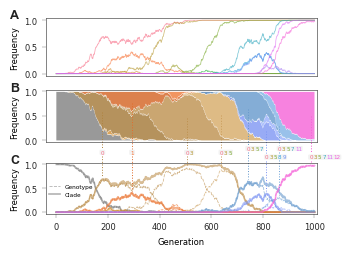

In [10]:
reload()
FIG.plot_figure_reconstruction_example(simulation, reconstruction, 
    annotate_together=True, plot_single_column=True, 
    plot_dot_for_WT_locus=False, add_background_behind_annotation=True,
    annotation_ys=[1.22] * 4 + [1.3, 1.12, 1.3, 1.12],
    genotype_color_indices_to_skip=[7, 8, 9],
    save_file=FIG_DIR + "/fig-reconstruction-example.pdf")


<a id='fig2'></a>

### Figure 2. Covariance and fitness values are accurately inferred from simulated allele frequency trajectories. 

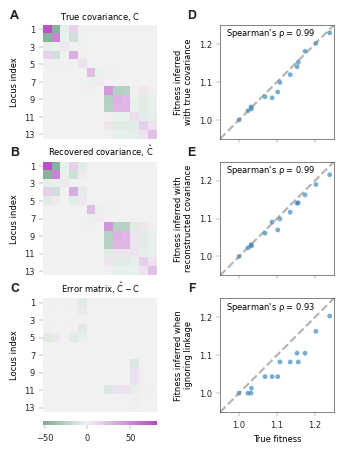

In [28]:
reload()
FIG.plot_figure_performance_example(simulation, reconstruction, evaluation,
    save_file=FIG_DIR + "/fig-perf-example.pdf")

<a id='fig3'></a>

### Figure 3. Performance benchmarking on simulated data.

In [10]:
%%time
reload()
(MAE_cov, Spearmanr_cov, Pearsonr_cov, MAE_selection, Spearmanr_selection, 
 Pearsonr_selection, MAE_fitness, Spearmanr_fitness, 
 Pearsonr_fitness) = SH.parse_performance_on_simulated_data(params, computePerfOnGenotypeFitness=True)


n=0	n=1	n=2	n=3	n=4	n=5	n=6	n=7	n=8	n=9	n=10	n=11	n=12	n=13	n=14	n=15	n=16	n=17	n=18	n=19	n=20	n=21	n=22	n=23	n=24	n=25	n=26	n=27	n=28	n=29	n=30	n=31	n=32	n=33	n=34	n=35	n=36	n=37	n=38	n=39	
CPU times: user 5min 51s, sys: 3.1 s, total: 5min 54s
Wall time: 5min 57s


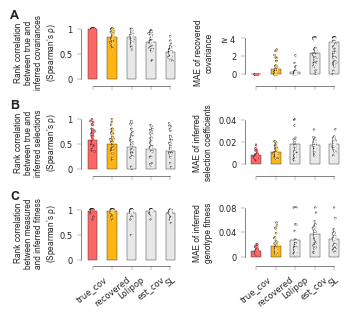

In [13]:
reload()
FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
    Spearmanr_cov, MAE_selection, Spearmanr_selection, 
    MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
    two_columns=True, evaluate_fitness=True,
    save_file=FIG_DIR + "/fig-perf-sim-true.pdf")

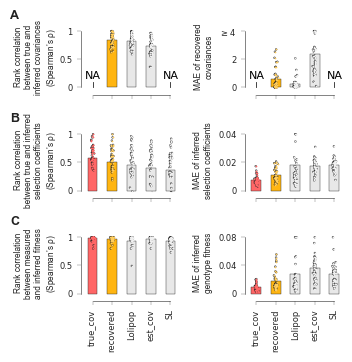

In [42]:
reload()
FIG.plot_figure_performance_on_simulated_data(MAE_cov, 
    Spearmanr_cov, MAE_selection, Spearmanr_selection, 
    MAE_fitness=MAE_fitness, Spearmanr_fitness=Spearmanr_fitness, 
    two_columns=True, evaluate_fitness=True,
    save_file=FIG_DIR + "/fig-perf-sim-true.pdf")

<a id='fig4'></a>

### Figure 4.  Reconstruction on population m6 of the LTEE data is nearly identical with previous results. 

In [29]:
%%time
reload()
LH.loadData(LH.populations)

CPU times: user 2min 5s, sys: 1.53 s, total: 2min 6s
Wall time: 2min 8s


In [30]:
reload()
reconstructions = LH.load_reconstructions_for_LTEE(LH.populations)

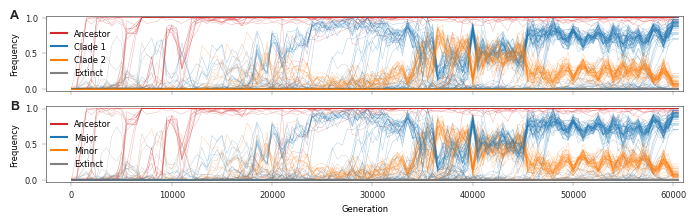

In [255]:
reload()
pop = 'm6'
FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
    LH.data, alpha=0.4, 
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE.pdf")

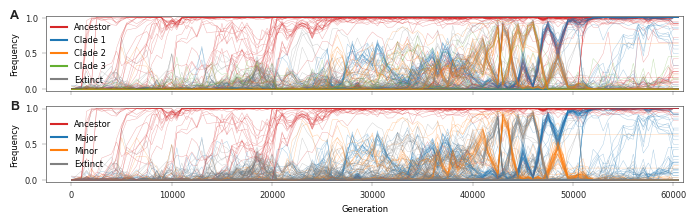

In [53]:
reload()
pop = 'p1'
FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
    LH.data, alpha=0.4, 
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-p1.pdf")

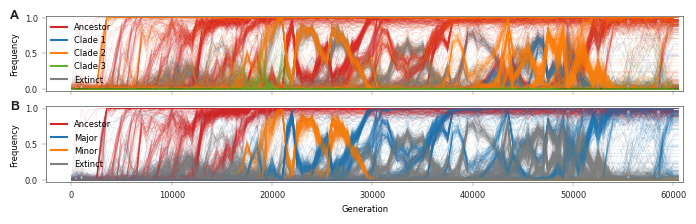

In [54]:
reload()
pop = 'p3'
FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
    LH.data, alpha=0.2, 
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-p3.pdf")

<a id='fig5'></a>

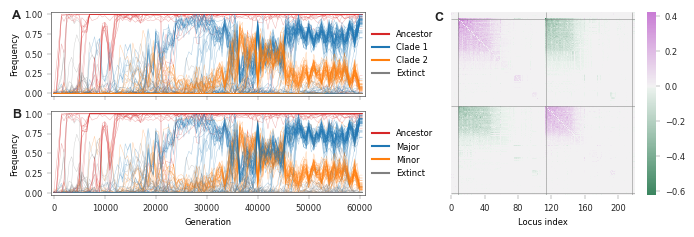

In [99]:
reload()
pop = 'm6'
FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
    LH.data, alpha=0.4, 
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE.svg")

### Figure 5.  Reconstruction on population m3 of the LTEE data revealed clonal interference not found in previous results. 

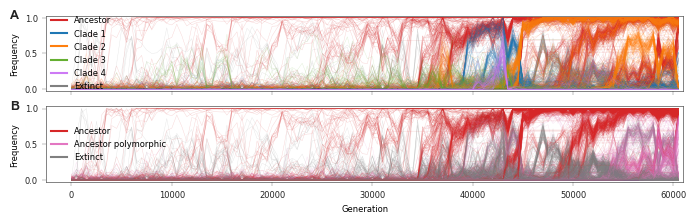

In [65]:
reload()
pop = 'm3'
FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
    LH.data, alpha=0.2,
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-nonclonal.pdf")

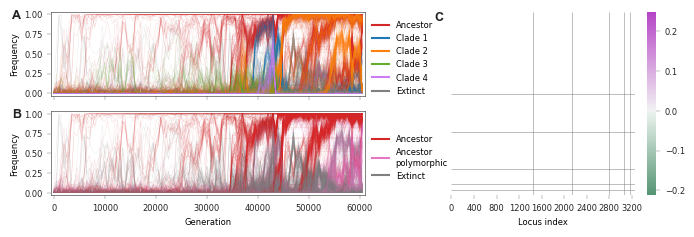

In [100]:
reload()
pop = 'm3'
FIG.plot_figure_reconstruction_example_LTEE(pop, reconstructions[pop], 
    LH.data, alpha=0.16,
    save_file=FIG_DIR + "/fig-reconstruction-example-LTEE-nonclonal.svg")

<a id='fig6'></a>

### Figure 6.  An overview of clusterization results on the LTEE data.

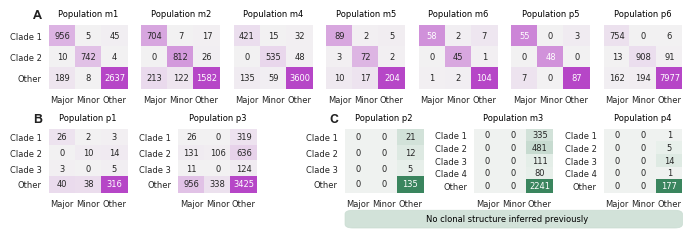

In [37]:
reload()
FIG.plot_figure_identities_LTEE(LH.populations, 
    reconstructions, LH.data,
    save_file=FIG_DIR + "/fig-identities-LTEE-with-horizontal-text.pdf")

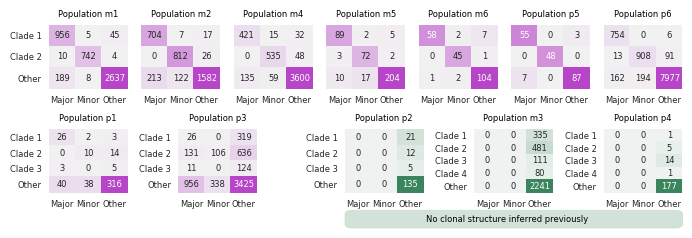

In [49]:
reload()
FIG.plot_figure_identities_LTEE(LH.populations, 
    reconstructions, LH.data, plot_sublabel=False,            
    save_file=FIG_DIR + "/fig-identities-LTEE-with-horizontal-text-no-sublabel.pdf")

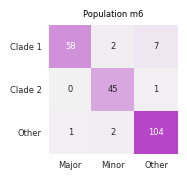

In [48]:
reload()
pop = 'm6'
FIG.plot_figure_identity_example_LTEE(pop, reconstructions[pop], LH.data, 
    save_file=FIG_DIR + "/fig-identity-example-LTEE-m6.pdf")

<a id='fig7'></a>

### Figure 7.  Reconstruction on data from ***Harris, K. B., Flynn, K. M. & Cooper, V. S. Polygenic Adaptation and Clonal Interference Enable Sustained Diversity in Experimental Pseudomonas aeruginosa Populations. Mol. Biol. Evol. 38, 5359–5375 (2021)***

In [55]:
%%time
reload()
trajectories = PALTEanalysis.parse_trajectories()
measured_fitness = PALTEanalysis.parse_measured_fitness()

reconstructions_PALTE, evaluations_PALTE, inferences_PALTE = PALTEanalysis.parse_reconstructions()

intCov_lolipop_PALTE, selection_lolipop_PALTE, fitness_lolipop_PALTE = PALTEanalysis.parse_Lolipop_results()

inferred_fitness_list = PALTEanalysis.parse_inferred_fitness_list(inferences_PALTE, fitness_lolipop_PALTE)


/Users/yunxiao/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/yunxiao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


CPU times: user 41.2 s, sys: 481 ms, total: 41.7 s
Wall time: 26.3 s


In [21]:
PALTEanalysis.METHODS

['recovered', 'Lolipop', 'est_cov', 'SL']

In [22]:
inferred_fitness_list

[{'WT': 1,
  'B1': 1.3049851542768445,
  'B2': 1.460740824063288,
  'B3': 1.1377606366135953,
  'P1': 1.0700927646245924,
  'P2': 1.132652839104366,
  'P3': 1.1259707823570426},
 {'WT': 1,
  'B1': 1.2453016083102466,
  'B2': 1.1862250659742366,
  'B3': 1.2067229428269073,
  'P1': 1.1482565282612736,
  'P2': 0.5541021505535018,
  'P3': 1.0613070794264399},
 {'WT': 1,
  'B1': 4.724247612441119,
  'B2': 5.019289331993534,
  'B3': 2.5804210964100416,
  'P1': 1.1590294032334156,
  'P2': 1.3107997706456422,
  'P3': 1.174444532140306},
 {'WT': 1,
  'B1': 2.513265303406472,
  'B2': 2.4778813810147735,
  'B3': 1.335297830231247,
  'P1': 1.10801559762762,
  'P2': 1.0765473788762754,
  'P3': 1.1580966846247907}]

In [31]:
measured_fitness_list = [measured_fitness[pop] 
                 for pop in PALTEanalysis.MEASURED_POPULATIONS]
fitness_est_cov = [inferred_fitness_list[2][pop] 
                 for pop in PALTEanalysis.MEASURED_POPULATIONS]
fitness_est_cov_test = [1,
 4.520970648887725,
 4.760366723449284,
 2.545826236875465,
 1.1013677601508711,
 1.2735837731972812,
 1.0893495653551408]

In [34]:
for a, b in zip(fitness_est_cov, fitness_est_cov_test):
    print(a, b)

1 1
4.724247612441119 4.520970648887725
5.019289331993534 4.760366723449284
2.5804210964100416 2.545826236875465
1.1590294032334156 1.1013677601508711
1.3107997706456422 1.2735837731972812
1.174444532140306 1.0893495653551408


In [30]:
stats.spearmanr(measured_fitness_list, 
                fitness_est_cov)[0]

0.9285714285714288

In [32]:
stats.spearmanr(measured_fitness_list, 
                fitness_est_cov_test)[0]

0.8571428571428573

In [33]:
stats.spearmanr(fitness_est_cov_test, 
                fitness_est_cov)[0]

0.9642857142857145

In [26]:
measured_fitness

{'WT': -0.23967644037955815,
 'B1': 5.577049140840931,
 'B2': 8.273241871938524,
 'B3': 7.196549607408974,
 'P1': 2.8676470062547974,
 'P2': 4.421157258385218,
 'P3': 5.070075707132396}

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


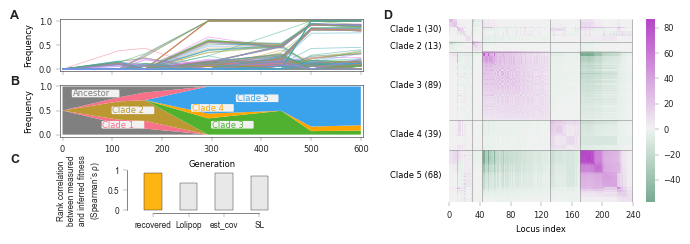

In [101]:
reload()
pop = 'B1'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.svg")

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


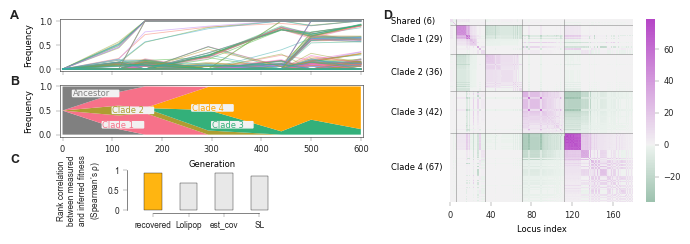

In [102]:
reload()
pop = 'B2'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


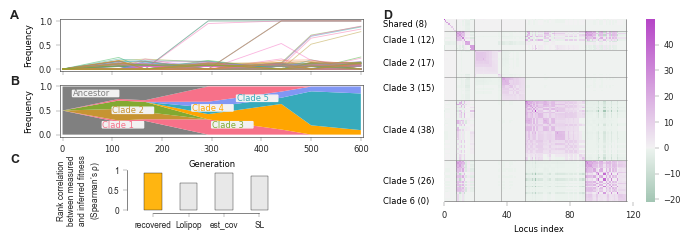

In [103]:
reload()
pop = 'B3'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


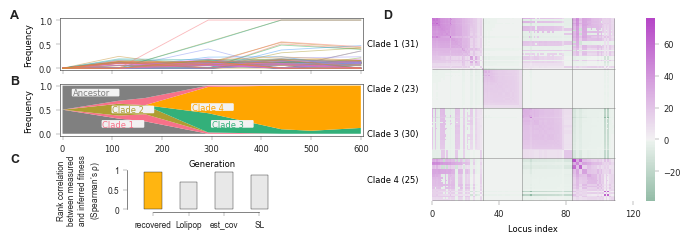

In [104]:
reload()
pop = 'P1'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


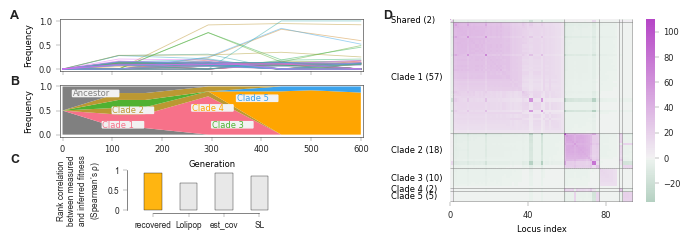

In [105]:
reload()
pop = 'P2'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

[-0.23967644037955815, 5.577049140840931, 8.273241871938524, 7.196549607408974, 2.8676470062547974, 4.421157258385218, 5.070075707132396]
[0.9285714285714288, 0.6785714285714287, 0.9285714285714288, 0.8571428571428573]


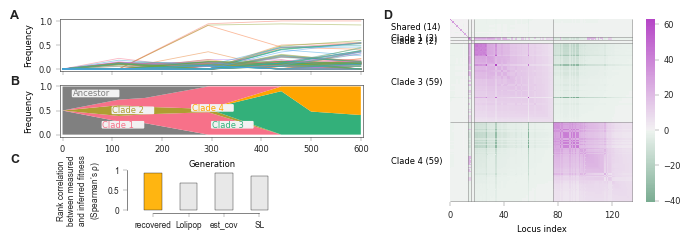

In [106]:
reload()
pop = 'P3'
FIG.plot_figure_performance_on_data_PALTE(trajectories[pop], 
    reconstructions_PALTE[pop], measured_fitness, inferred_fitness_list, 
#     save_file=FIG_DIR + f"/fig-perf-PALTE-{pop}.pdf")
    save_file=None)

<a id='supp-fig1'></a>

### Supplementary Figure 1. Reconstruction on data from ***Scribner, M. R., Santos-Lopez, A., Marshall, C. W., Deitrick, C. & Cooper, V. S. Parallel Evolution of Tobramycin Resistance across Species and Environments. MBio 11, (2020)***

In [60]:
%%time
reload()
intCov_lolipop_TOB, selection_lolipop_TOB, fitness_lolipop_TOB = tobramycin_analysis.parse_Lolipop_results()
reconstructions_TOB, evaluations_TOB, inferences_TOB = tobramycin_analysis.parse_reconstructions()
measured_MIC_list = tobramycin_analysis.parse_measured_MIC_list()
median_inferred_fitness_lists = tobramycin_analysis.parse_median_inferred_fitness_list_of_methods(inferences_TOB, selection_lolipop_TOB)



CPU times: user 392 ms, sys: 13.2 ms, total: 405 ms
Wall time: 430 ms


In [98]:
measured_MIC_list

[0.5, 2.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0]

[0.5, 2.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0]
[0.7165410061057312, 0.5312286769404558, 0.2470831055537004, 0.30885388194212554]


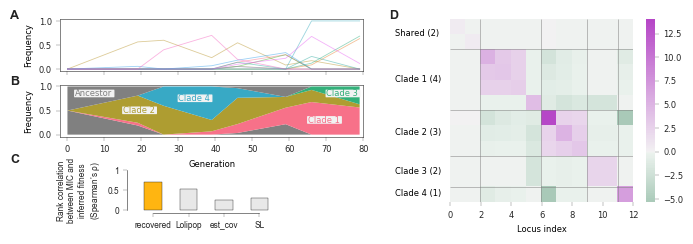

In [61]:
reload()
medium, rpl = 'Planktonic', 1
FIG.plot_figure_performance_on_data_tobramycin(tobramycin_analysis.traj_pa[medium][rpl][0], 
    reconstructions_TOB[medium][rpl], measured_MIC_list, median_inferred_fitness_lists,
    save_file=FIG_DIR + f"/fig-perf-tobramycin-{medium}-{rpl+1}.pdf")
